# Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed
seed(1)
import pandas as pd
import quandl
import statsmodels
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.stattools import acf, pacf
import math
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf

# Variables

#### 1. Copper Producer Price Index
#### 2. Gold
#### 3. JPY/USD
#### 4. Household Financial Obligations as a percent of Disposable Personal Income
#### 5. Total Assets, All Commercial Banks
#### 6. GDP: Implicit Price Deflator
#### 7. US Federal Funds Rate
#### 8. Unemployment
#### 9. Nondurables
#### 10. Copper production

# Copper Producer Price Index

In [2]:
copper_price_index = quandl.get("FRED/WPUSI019011", start_date='1985-09-01', end_date='2017-09-30', api_key='enter_api_key', collapse='quarterly')
copper_price_index

,Value
Date,
1985-09-30,99.2
1985-12-31,99.4
1986-03-31,101.8
1986-06-30,99.9
1986-09-30,98.4
...,...
2016-09-30,313.8
2016-12-31,354.6
2017-03-31,361.0


In [3]:
copper_price_index=np.array(copper_price_index)
copper_price_index=np.log(copper_price_index)
copper_price_index

array([[4.59713801],
       [4.59915211],
       [4.6230101 ],
       [4.60416969],
       [4.5890408 ],
       [4.58802403],
       [4.6230101 ],
       [4.67376298],
       [4.76983681],
       [5.00394631],
       [4.95582706],
       [4.99179221],
       [4.99518319],
       [5.2585365 ],
       [5.23484494],
       [5.10533923],
       [5.18234519],
       [5.06701563],
       [5.10836678],
       [5.11198779],
       [5.20180647],
       [5.0937502 ],
       [5.07642303],
       [5.00863329],
       [5.02519545],
       [5.01727984],
       [5.02322241],
       [5.05688255],
       [5.07392303],
       [4.99314998],
       [4.98017609],
       [4.88204406],
       [4.88052661],
       [4.83230576],
       [4.92797806],
       [5.05688255],
       [5.11859244],
       [5.23164323],
       [5.24649762],
       [5.24755025],
       [5.25749537],
       [5.25749537],
       [5.16249764],
       [5.16020406],
       [4.97397131],
       [5.03954664],
       [5.11078224],
       [5.122

In [4]:
copper_price_index=copper_price_index.reshape(-1)
copper_price_index

array([4.59713801, 4.59915211, 4.6230101 , 4.60416969, 4.5890408 ,
       4.58802403, 4.6230101 , 4.67376298, 4.76983681, 5.00394631,
       4.95582706, 4.99179221, 4.99518319, 5.2585365 , 5.23484494,
       5.10533923, 5.18234519, 5.06701563, 5.10836678, 5.11198779,
       5.20180647, 5.0937502 , 5.07642303, 5.00863329, 5.02519545,
       5.01727984, 5.02322241, 5.05688255, 5.07392303, 4.99314998,
       4.98017609, 4.88204406, 4.88052661, 4.83230576, 4.92797806,
       5.05688255, 5.11859244, 5.23164323, 5.24649762, 5.24755025,
       5.25749537, 5.25749537, 5.16249764, 5.16020406, 4.97397131,
       5.03954664, 5.11078224, 5.12277279, 5.01462732, 4.89709325,
       4.85281121, 4.82189317, 4.81624116, 4.72561634, 4.69683737,
       4.72915617, 4.84103251, 4.85748411, 4.86753445, 4.87290462,
       4.94306997, 4.92725369, 4.87290462, 4.84654651, 4.80402104,
       4.78665806, 4.82591085, 4.84968376, 4.78164133, 4.81624116,
       4.83548794, 4.84418709, 4.88128562, 5.00260312, 5.21710

# Gold

In [5]:
gold = quandl.get("FRED/PCU2122212122210", start_date='1985-09-01', end_date='2017-09-30', api_key='enter_api_key', collapse='quarterly')
gold

,Value
Date,
1985-09-30,99.2
1985-12-31,98.3
1986-03-31,102.9
1986-06-30,102.9
1986-09-30,108.1
...,...
2016-09-30,328.1
2016-12-31,295.0
2017-03-31,303.0


In [6]:
gold=np.array(gold)
gold=np.log(gold)
gold

array([[4.59713801],
       [4.58802403],
       [4.63375764],
       [4.63375764],
       [4.68305672],
       [4.67749085],
       [4.79081953],
       [4.91852001],
       [4.91925073],
       [4.9351931 ],
       [4.89709325],
       [4.89185176],
       [4.82028157],
       [4.80402104],
       [4.75445189],
       [4.72384172],
       [4.70138904],
       [4.78498861],
       [4.77491296],
       [4.68767141],
       [4.76131887],
       [4.71760562],
       [4.68120487],
       [4.66155052],
       [4.65776264],
       [4.69592455],
       [4.67189382],
       [4.6434289 ],
       [4.6558633 ],
       [4.6220273 ],
       [4.59410924],
       [4.69318106],
       [4.68490515],
       [4.71492105],
       [4.72295322],
       [4.73444252],
       [4.75960654],
       [4.74232002],
       [4.74057482],
       [4.75789127],
       [4.74840435],
       [4.75874927],
       [4.78331637],
       [4.75874927],
       [4.75186457],
       [4.71581671],
       [4.67189382],
       [4.648

In [7]:
gold=gold.reshape(-1)
gold

array([4.59713801, 4.58802403, 4.63375764, 4.63375764, 4.68305672,
       4.67749085, 4.79081953, 4.91852001, 4.91925073, 4.9351931 ,
       4.89709325, 4.89185176, 4.82028157, 4.80402104, 4.75445189,
       4.72384172, 4.70138904, 4.78498861, 4.77491296, 4.68767141,
       4.76131887, 4.71760562, 4.68120487, 4.66155052, 4.65776264,
       4.69592455, 4.67189382, 4.6434289 , 4.6558633 , 4.6220273 ,
       4.59410924, 4.69318106, 4.68490515, 4.71492105, 4.72295322,
       4.73444252, 4.75960654, 4.74232002, 4.74057482, 4.75789127,
       4.74840435, 4.75874927, 4.78331637, 4.75874927, 4.75186457,
       4.71581671, 4.67189382, 4.64822968, 4.58496748, 4.4761998 ,
       4.50976   , 4.50976   , 4.47733681, 4.49758498, 4.48638665,
       4.38327585, 4.37071287, 4.4355674 , 4.46590812, 4.46360662,
       4.41400968, 4.403054  , 4.39814602, 4.39568296, 4.44617445,
       4.40060302, 4.47847253, 4.550714  , 4.56017282, 4.57264699,
       4.64246597, 4.66626529, 4.72827238, 4.78832473, 4.78080

# JPY/USD

In [8]:
jpyusd = quandl.get("FRED/DEXJPUS", start_date='1985-09-01', end_date='2017-10-01', api_key='enter_api_key', collapse='quarterly')
jpyusd

,Value
Date,
1985-09-30,216.50
1985-12-31,200.25
1986-03-31,177.60
1986-06-30,163.80
1986-09-30,154.35
...,...
2016-09-30,101.21
2016-12-31,116.78
2017-03-31,111.41


In [9]:
jpyusd=np.array(jpyusd)
jpyusd=np.log(jpyusd)
jpyusd

array([[5.37759055],
       [5.29956659],
       [5.17953383],
       [5.09864617],
       [5.03922275],
       [5.06449197],
       [4.98141244],
       [4.98907112],
       [4.98702543],
       [4.79785453],
       [4.82108769],
       [4.89432617],
       [4.89709325],
       [4.82871366],
       [4.88861831],
       [4.9698133 ],
       [4.93878119],
       [4.96842345],
       [5.06145514],
       [5.02618051],
       [4.9292083 ],
       [4.91081496],
       [4.94591898],
       [4.92652878],
       [4.88922067],
       [4.82751342],
       [4.88974744],
       [4.83524963],
       [4.78749174],
       [4.82711302],
       [4.74406218],
       [4.67095793],
       [4.66391068],
       [4.71581671],
       [4.62888671],
       [4.59015807],
       [4.59562477],
       [4.60116216],
       [4.46418249],
       [4.44005967],
       [4.59612944],
       [4.63744375],
       [4.67282883],
       [4.69574188],
       [4.71536898],
       [4.75160546],
       [4.81802095],
       [4.741

In [10]:
jpyusd=jpyusd.reshape(-1)
jpyusd

array([5.37759055, 5.29956659, 5.17953383, 5.09864617, 5.03922275,
       5.06449197, 4.98141244, 4.98907112, 4.98702543, 4.79785453,
       4.82108769, 4.89432617, 4.89709325, 4.82871366, 4.88861831,
       4.9698133 , 4.93878119, 4.96842345, 5.06145514, 5.02618051,
       4.9292083 , 4.91081496, 4.94591898, 4.92652878, 4.88922067,
       4.82751342, 4.88974744, 4.83524963, 4.78749174, 4.82711302,
       4.74406218, 4.67095793, 4.66391068, 4.71581671, 4.62888671,
       4.59015807, 4.59562477, 4.60116216, 4.46418249, 4.44005967,
       4.59612944, 4.63744375, 4.67282883, 4.69574188, 4.71536898,
       4.75160546, 4.81802095, 4.74153506, 4.79339097, 4.87099001,
       4.89252721, 4.92935293, 4.91698374, 4.72809553, 4.77432207,
       4.79529455, 4.67114517, 4.62654021, 4.63210419, 4.66475898,
       4.68120487, 4.73926392, 4.83262443, 4.8261514 , 4.7810544 ,
       4.87550262, 4.88809094, 4.78624096, 4.80188762, 4.77702044,
       4.77127767, 4.78640782, 4.71339659, 4.67404305, 4.64612

# Household Financial Obligations as a percent of Disposable Personal Income

In [11]:
financialobs = quandl.get("FRED/FODSP", start_date='1985-09-01', end_date='2017-10-01', api_key='enter_api_key')
financialobs

,Value
Date,
1985-10-01,17.066061
1986-01-01,17.064555
1986-04-01,17.183377
1986-07-01,17.330634
1986-10-01,17.539071
...,...
2016-10-01,15.694672
2017-01-01,15.571108
2017-04-01,15.560202


In [12]:
financialobs=np.array(financialobs)
financialobs

array([[17.066061],
       [17.064555],
       [17.183377],
       [17.330634],
       [17.539071],
       [17.394269],
       [17.600464],
       [17.419134],
       [17.242252],
       [17.145897],
       [17.082064],
       [16.997349],
       [16.849392],
       [16.792459],
       [16.976871],
       [17.053178],
       [17.007589],
       [16.900919],
       [16.875752],
       [16.888249],
       [16.960268],
       [16.960137],
       [16.818953],
       [16.703078],
       [16.479746],
       [16.160733],
       [15.971127],
       [15.826784],
       [15.752581],
       [15.673178],
       [15.593555],
       [15.669738],
       [15.641764],
       [15.690103],
       [15.761009],
       [15.914829],
       [15.99562 ],
       [16.198637],
       [16.411955],
       [16.52922 ],
       [16.572483],
       [16.558361],
       [16.557834],
       [16.606741],
       [16.664822],
       [16.631998],
       [16.653272],
       [16.64924 ],
       [16.548342],
       [16.32527 ],


In [13]:
financialobs=financialobs.reshape(-1)
financialobs=np.log(financialobs)

# Total Assets, All Commercial Banks

In [14]:
assets = quandl.get("FRED/TLAACBQ158SBOG", start_date='1985-09-01', end_date='2017-10-01', api_key='enter_api_key')
assets

,Value
Date,
1985-10-01,8.9
1986-01-01,9.6
1986-04-01,7.2
1986-07-01,9.0
1986-10-01,7.9
...,...
2016-10-01,-0.7
2017-01-01,2.9
2017-04-01,2.5


In [15]:
assets=np.array(assets)
assets

array([[  8.9],
       [  9.6],
       [  7.2],
       [  9. ],
       [  7.9],
       [ 10.1],
       [  6.9],
       [  2.3],
       [  5.6],
       [  4.3],
       [  9.4],
       [  6.6],
       [  5.1],
       [  5.9],
       [  5.8],
       [  9.1],
       [  7.3],
       [  6. ],
       [  5.8],
       [  7.3],
       [  0.6],
       [ -0.2],
       [  2. ],
       [  2.4],
       [  7.2],
       [  5.4],
       [  2. ],
       [  3.9],
       [  5. ],
       [  1.7],
       [  8.2],
       [  6.9],
       [  3.1],
       [  8. ],
       [  6.5],
       [  7.7],
       [  4.9],
       [  7.8],
       [ 13.7],
       [  7.7],
       [  4.2],
       [  2.3],
       [  1.5],
       [  2.6],
       [  6. ],
       [ 10.2],
       [ 10.9],
       [  9.1],
       [ 10.1],
       [ 12.3],
       [  8.2],
       [  8. ],
       [ 11.8],
       [  0.5],
       [  1.7],
       [  5.1],
       [ 10.3],
       [ 11.3],
       [ 11.2],
       [  7.5],
       [  4. ],
       [  9.5],
       [

In [16]:
assets=assets.reshape(-1)
assets

array([  8.9,   9.6,   7.2,   9. ,   7.9,  10.1,   6.9,   2.3,   5.6,
         4.3,   9.4,   6.6,   5.1,   5.9,   5.8,   9.1,   7.3,   6. ,
         5.8,   7.3,   0.6,  -0.2,   2. ,   2.4,   7.2,   5.4,   2. ,
         3.9,   5. ,   1.7,   8.2,   6.9,   3.1,   8. ,   6.5,   7.7,
         4.9,   7.8,  13.7,   7.7,   4.2,   2.3,   1.5,   2.6,   6. ,
        10.2,  10.9,   9.1,  10.1,  12.3,   8.2,   8. ,  11.8,   0.5,
         1.7,   5.1,  10.3,  11.3,  11.2,   7.5,   4. ,   9.5,   5.1,
         6.5,   3.8,  -0.8,   0.9,  10.5,  17.9,  11.3,  11.6,   3.7,
        -3.9,   7.7,   9.6,   9.6,   5. ,   7.4,   9.4,   8.6,   7. ,
         8.6,  12. ,   7.8,   7. ,   8.3,   8.1,  10.7,  12.1,  10. ,
         0.5,  -0.3,  20.4,  -3.4,  -4.9, -12.4,  -3.8,  -1.5,  -8.4,
         0.1,   1.1,   3. ,  10.2,   4.5,   2.9,   2. ,   1.8,   3.3,
         3.4,   7.4,   4.9,   5.2,   8.5,   7.4,   8.1,   8.1,   4.7,
         7.1,   2. ,   1.2,   4.4,   2.9,   5. ,   3.6,  -0.7,   2.9,
         2.5,   4.9,

# GDP: Implicit Price Deflator

In [17]:
gdp = quandl.get("FRED/GDPDEF", start_date='1985-09-01', end_date='2017-10-01', api_key='enter_api_key')
gdp

,Value
Date,
1985-10-01,55.047
1986-01-01,55.321
1986-04-01,55.531
1986-07-01,55.758
1986-10-01,56.062
...,...
2016-10-01,106.551
2017-01-01,107.058
2017-04-01,107.411


In [18]:
gdp=np.array(gdp)
gdp

array([[ 55.047],
       [ 55.321],
       [ 55.531],
       [ 55.758],
       [ 56.062],
       [ 56.418],
       [ 56.809],
       [ 57.239],
       [ 57.695],
       [ 58.147],
       [ 58.713],
       [ 59.415],
       [ 59.929],
       [ 60.553],
       [ 61.198],
       [ 61.645],
       [ 62.084],
       [ 62.754],
       [ 63.457],
       [ 64.001],
       [ 64.477],
       [ 65.109],
       [ 65.587],
       [ 66.099],
       [ 66.492],
       [ 66.739],
       [ 67.14 ],
       [ 67.468],
       [ 67.932],
       [ 68.313],
       [ 68.719],
       [ 69.128],
       [ 69.505],
       [ 69.837],
       [ 70.174],
       [ 70.577],
       [ 70.96 ],
       [ 71.344],
       [ 71.687],
       [ 72.04 ],
       [ 72.387],
       [ 72.736],
       [ 73.037],
       [ 73.276],
       [ 73.668],
       [ 74.107],
       [ 74.257],
       [ 74.579],
       [ 74.824],
       [ 74.933],
       [ 75.11 ],
       [ 75.433],
       [ 75.641],
       [ 75.926],
       [ 76.201],
       [ 7

In [19]:
gdp=gdp.reshape(-1)
gdp

array([ 55.047,  55.321,  55.531,  55.758,  56.062,  56.418,  56.809,
        57.239,  57.695,  58.147,  58.713,  59.415,  59.929,  60.553,
        61.198,  61.645,  62.084,  62.754,  63.457,  64.001,  64.477,
        65.109,  65.587,  66.099,  66.492,  66.739,  67.14 ,  67.468,
        67.932,  68.313,  68.719,  69.128,  69.505,  69.837,  70.174,
        70.577,  70.96 ,  71.344,  71.687,  72.04 ,  72.387,  72.736,
        73.037,  73.276,  73.668,  74.107,  74.257,  74.579,  74.824,
        74.933,  75.11 ,  75.433,  75.641,  75.926,  76.201,  76.462,
        76.873,  77.396,  77.865,  78.309,  78.723,  79.204,  79.683,
        80.004,  80.268,  80.533,  80.821,  81.194,  81.654,  82.025,
        82.266,  82.712,  83.201,  83.82 ,  84.504,  85.056,  85.712,
        86.391,  86.996,  87.783,  88.489,  89.107,  89.852,  90.481,
        90.815,  91.708,  92.301,  92.776,  93.145,  93.489,  93.99 ,
        94.69 ,  94.986,  94.976,  94.838,  94.938,  95.259,  95.499,
        95.943,  96.

In [20]:
gdp=np.log(gdp)

# US Federal Funds Rate

In [21]:
federalfunds = quandl.get("FED/FL072052006_Q", start_date='1985-09-01', end_date='2017-10-01', api_key='enter_api_key')
federalfunds

,Value
Date,
1985-09-30,7.90
1985-12-31,8.30
1986-03-31,7.50
1986-06-30,6.90
1986-09-30,5.90
...,...
2016-09-30,0.40
2016-12-31,0.54
2017-03-31,0.79


In [22]:
federalfunds=np.array(federalfunds)
federalfunds

array([[7.9 ],
       [8.3 ],
       [7.5 ],
       [6.9 ],
       [5.9 ],
       [6.9 ],
       [6.1 ],
       [6.7 ],
       [7.2 ],
       [6.8 ],
       [6.6 ],
       [7.5 ],
       [8.2 ],
       [8.8 ],
       [9.9 ],
       [9.5 ],
       [9.  ],
       [8.5 ],
       [8.3 ],
       [8.3 ],
       [8.2 ],
       [7.3 ],
       [6.1 ],
       [5.9 ],
       [5.5 ],
       [4.4 ],
       [4.  ],
       [3.8 ],
       [3.2 ],
       [2.9 ],
       [3.1 ],
       [3.  ],
       [3.1 ],
       [3.  ],
       [3.3 ],
       [4.3 ],
       [4.7 ],
       [5.5 ],
       [6.  ],
       [6.  ],
       [5.8 ],
       [5.6 ],
       [5.3 ],
       [5.3 ],
       [5.3 ],
       [5.3 ],
       [5.4 ],
       [5.6 ],
       [5.5 ],
       [5.5 ],
       [5.5 ],
       [5.6 ],
       [5.5 ],
       [4.7 ],
       [4.8 ],
       [4.8 ],
       [5.2 ],
       [5.3 ],
       [5.9 ],
       [6.5 ],
       [6.5 ],
       [6.4 ],
       [5.3 ],
       [4.  ],
       [3.1 ],
       [1.8 ],
       [1.

In [23]:
federalfunds=federalfunds.reshape(-1)
federalfunds

array([7.9 , 8.3 , 7.5 , 6.9 , 5.9 , 6.9 , 6.1 , 6.7 , 7.2 , 6.8 , 6.6 ,
       7.5 , 8.2 , 8.8 , 9.9 , 9.5 , 9.  , 8.5 , 8.3 , 8.3 , 8.2 , 7.3 ,
       6.1 , 5.9 , 5.5 , 4.4 , 4.  , 3.8 , 3.2 , 2.9 , 3.1 , 3.  , 3.1 ,
       3.  , 3.3 , 4.3 , 4.7 , 5.5 , 6.  , 6.  , 5.8 , 5.6 , 5.3 , 5.3 ,
       5.3 , 5.3 , 5.4 , 5.6 , 5.5 , 5.5 , 5.5 , 5.6 , 5.5 , 4.7 , 4.8 ,
       4.8 , 5.2 , 5.3 , 5.9 , 6.5 , 6.5 , 6.4 , 5.3 , 4.  , 3.1 , 1.8 ,
       1.7 , 1.8 , 1.8 , 1.2 , 1.3 , 1.2 , 1.  , 1.  , 1.  , 1.  , 1.6 ,
       2.2 , 2.6 , 3.  , 3.6 , 4.2 , 4.6 , 5.  , 5.3 , 5.2 , 5.3 , 5.3 ,
       4.9 , 4.2 , 2.6 , 2.  , 1.8 , 0.2 , 0.2 , 0.2 , 0.2 , 0.1 , 0.2 ,
       0.2 , 0.2 , 0.2 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.2 , 0.1 , 0.2 ,
       0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.13, 0.14,
       0.24, 0.36, 0.38, 0.4 , 0.54, 0.79, 1.04, 1.15])

# Unemployment

In [24]:
unemployment = quandl.get("FRED/NROU", start_date='1985-09-01', end_date='2017-10-01', api_key='enter_api_key')
unemployment

,Value
Date,
1985-10-01,6.008578
1986-01-01,5.997622
1986-04-01,5.986110
1986-07-01,5.973968
1986-10-01,5.961125
...,...
2016-10-01,4.556973
2017-01-01,4.542150
2017-04-01,4.529291


In [25]:
unemployment=np.array(unemployment)
unemployment

array([[6.008578  ],
       [5.997622  ],
       [5.98611   ],
       [5.97396755],
       [5.96112537],
       [5.9475255 ],
       [5.9331255 ],
       [5.91790152],
       [5.901855  ],
       [5.885015  ],
       [5.86744   ],
       [5.849217  ],
       [5.83045244],
       [5.81126738],
       [5.791787  ],
       [5.772135  ],
       [5.75242853],
       [5.732765  ],
       [5.71323061],
       [5.69390249],
       [5.67485142],
       [5.65614557],
       [5.637838  ],
       [5.619961  ],
       [5.602534  ],
       [5.58557653],
       [5.569084  ],
       [5.553059  ],
       [5.537511  ],
       [5.522455  ],
       [5.50790453],
       [5.49386454],
       [5.48034143],
       [5.46733856],
       [5.454845  ],
       [5.442838  ],
       [5.431291  ],
       [5.420172  ],
       [5.40945148],
       [5.399091  ],
       [5.38905   ],
       [5.379276  ],
       [5.36970949],
       [5.36029243],
       [5.35097361],
       [5.341696  ],
       [5.33240938],
       [5.323

In [26]:
unemployment=unemployment.reshape(-1)
unemployment

array([6.008578  , 5.997622  , 5.98611   , 5.97396755, 5.96112537,
       5.9475255 , 5.9331255 , 5.91790152, 5.901855  , 5.885015  ,
       5.86744   , 5.849217  , 5.83045244, 5.81126738, 5.791787  ,
       5.772135  , 5.75242853, 5.732765  , 5.71323061, 5.69390249,
       5.67485142, 5.65614557, 5.637838  , 5.619961  , 5.602534  ,
       5.58557653, 5.569084  , 5.553059  , 5.537511  , 5.522455  ,
       5.50790453, 5.49386454, 5.48034143, 5.46733856, 5.454845  ,
       5.442838  , 5.431291  , 5.420172  , 5.40945148, 5.399091  ,
       5.38905   , 5.379276  , 5.36970949, 5.36029243, 5.35097361,
       5.341696  , 5.33240938, 5.32308054, 5.31369   , 5.304222  ,
       5.294664  , 5.285001  , 5.275233  , 5.265363  , 5.25539446,
       5.24533367, 5.23518467, 5.224948  , 5.214622  , 5.204211  ,
       5.193731  , 5.18319655, 5.17261362, 5.161983  , 5.151313  ,
       5.14061546, 5.129905  , 5.119209  , 5.10856152, 5.09799   ,
       5.087525  , 5.077202  , 5.06705856, 5.057126  , 5.04743

In [27]:
unemployment=np.log(unemployment)

# Nondurables

In [28]:
nondurable = quandl.get("FRED/CAPUTLGMFOSQ", start_date='1985-09-01', end_date='2017-10-01', api_key='enter_api_key')
nondurable

,Value
Date,
1985-10-01,88.2960
1986-01-01,87.4488
1986-04-01,90.1060
1986-07-01,88.9694
1986-10-01,88.7526
...,...
2016-10-01,65.2676
2017-01-01,66.4705
2017-04-01,66.6671


In [29]:
nondurable=np.array(nondurable)
nondurable

array([[88.296 ],
       [87.4488],
       [90.106 ],
       [88.9694],
       [88.7526],
       [89.2962],
       [90.2396],
       [91.2566],
       [91.044 ],
       [90.5162],
       [88.8801],
       [87.1937],
       [87.688 ],
       [87.1652],
       [86.3448],
       [84.4097],
       [83.8204],
       [84.3288],
       [83.9318],
       [83.9689],
       [82.6331],
       [81.2433],
       [80.4487],
       [80.76  ],
       [80.8551],
       [79.6755],
       [80.3613],
       [80.4182],
       [80.0343],
       [81.6623],
       [81.799 ],
       [80.9641],
       [81.0559],
       [81.1887],
       [81.3145],
       [81.2199],
       [82.2087],
       [83.0118],
       [82.6089],
       [82.2397],
       [80.9791],
       [79.8488],
       [80.4827],
       [80.4411],
       [81.537 ],
       [83.5682],
       [84.8208],
       [86.5361],
       [87.3588],
       [86.4658],
       [86.9475],
       [87.0084],
       [86.8632],
       [86.3496],
       [86.2323],
       [87

In [30]:
nondurable=nondurable.reshape(-1)
nondurable

array([88.296 , 87.4488, 90.106 , 88.9694, 88.7526, 89.2962, 90.2396,
       91.2566, 91.044 , 90.5162, 88.8801, 87.1937, 87.688 , 87.1652,
       86.3448, 84.4097, 83.8204, 84.3288, 83.9318, 83.9689, 82.6331,
       81.2433, 80.4487, 80.76  , 80.8551, 79.6755, 80.3613, 80.4182,
       80.0343, 81.6623, 81.799 , 80.9641, 81.0559, 81.1887, 81.3145,
       81.2199, 82.2087, 83.0118, 82.6089, 82.2397, 80.9791, 79.8488,
       80.4827, 80.4411, 81.537 , 83.5682, 84.8208, 86.5361, 87.3588,
       86.4658, 86.9475, 87.0084, 86.8632, 86.3496, 86.2323, 87.1007,
       89.2339, 88.6746, 88.2079, 87.5139, 85.559 , 82.9742, 82.7422,
       83.3423, 82.534 , 81.9752, 81.0365, 81.4768, 81.7413, 82.5947,
       81.7457, 80.7611, 81.0078, 81.4795, 82.6424, 83.7654, 81.8915,
       81.9378, 82.1801, 81.7472, 81.6652, 82.0792, 81.6265, 78.5134,
       77.1715, 76.4001, 76.3422, 76.1021, 76.4873, 77.524 , 77.3865,
       78.1453, 76.1073, 72.1468, 69.1067, 68.1904, 68.9532, 66.9189,
       66.0999, 65.8

# Copper Production

In [31]:
copper_production = quandl.get("FRED/IPG21223SQ", start_date='1985-09-01', end_date='2017-10-01', api_key='enter_api_key')
copper_production

,Value
Date,
1985-10-01,85.9431
1986-01-01,85.4542
1986-04-01,83.8305
1986-07-01,85.5597
1986-10-01,85.0698
...,...
2016-10-01,114.7248
2017-01-01,110.4408
2017-04-01,108.6626


In [32]:
copper_production=np.array(copper_production)
copper_production=np.log(copper_production)
copper_production

array([[4.45368545],
       [4.44798056],
       [4.4287969 ],
       [4.44921438],
       [4.4434721 ],
       [4.47056965],
       [4.49089673],
       [4.54074792],
       [4.55674016],
       [4.57993135],
       [4.64065315],
       [4.6772471 ],
       [4.69438821],
       [4.73194115],
       [4.7070343 ],
       [4.69081104],
       [4.70193658],
       [4.72723914],
       [4.78349627],
       [4.85666871],
       [4.85896553],
       [4.83974891],
       [4.83623508],
       [4.82948425],
       [4.81404117],
       [4.83536561],
       [4.88781057],
       [4.9202495 ],
       [4.92948236],
       [4.86935971],
       [4.91282031],
       [4.87697132],
       [4.94597232],
       [4.97011325],
       [4.91712649],
       [4.94242283],
       [4.92281486],
       [4.93671674],
       [4.94720052],
       [4.96008909],
       [4.93548134],
       [4.94585425],
       [4.98277271],
       [4.98453154],
       [5.00225898],
       [4.9746108 ],
       [4.98919304],
       [5.009

In [33]:
copper_production=copper_production.reshape(-1)
copper_production

array([4.45368545, 4.44798056, 4.4287969 , 4.44921438, 4.4434721 ,
       4.47056965, 4.49089673, 4.54074792, 4.55674016, 4.57993135,
       4.64065315, 4.6772471 , 4.69438821, 4.73194115, 4.7070343 ,
       4.69081104, 4.70193658, 4.72723914, 4.78349627, 4.85666871,
       4.85896553, 4.83974891, 4.83623508, 4.82948425, 4.81404117,
       4.83536561, 4.88781057, 4.9202495 , 4.92948236, 4.86935971,
       4.91282031, 4.87697132, 4.94597232, 4.97011325, 4.91712649,
       4.94242283, 4.92281486, 4.93671674, 4.94720052, 4.96008909,
       4.93548134, 4.94585425, 4.98277271, 4.98453154, 5.00225898,
       4.9746108 , 4.98919304, 5.00950065, 4.99092906, 4.97526991,
       4.96242216, 5.00595436, 5.00837474, 4.98365662, 4.92031591,
       4.84018618, 4.81553402, 4.81548135, 4.82276236, 4.80535458,
       4.79306949, 4.76218334, 4.77476105, 4.7386437 , 4.70316131,
       4.62939928, 4.605786  , 4.59493397, 4.58539596, 4.58015695,
       4.58551631, 4.60994477, 4.57932916, 4.56048135, 4.56127

# Cointegration

In [34]:
coin_result_1 = ts.coint(gold, copper_price_index)
coin_result_1

(-2.292356439856822,
 0.37737299513483363,
 array([-3.98404804, -3.3842816 , -3.07775039]))

In [35]:
coin_result_2 = ts.coint(jpyusd, copper_price_index)
coin_result_2

(-2.868954601432259,
 0.14472755122445358,
 array([-3.98404804, -3.3842816 , -3.07775039]))

In [36]:
coin_result_3 = ts.coint(financialobs, copper_price_index)
coin_result_3

(-2.1130859975137435,
 0.46952875202221567,
 array([-3.98404804, -3.3842816 , -3.07775039]))

In [37]:
coin_result_4 = ts.coint(assets, copper_price_index)
coin_result_4

(-7.030137738227275,
 7.273958862435694e-09,
 array([-3.98404804, -3.3842816 , -3.07775039]))

In [38]:
coin_result_5 = ts.coint(gdp, copper_price_index)
coin_result_5

(-1.7774182897065562,
 0.6406245825853338,
 array([-3.98404804, -3.3842816 , -3.07775039]))

In [39]:
coin_result_6 = ts.coint(federalfunds, copper_price_index)
coin_result_6

(-3.3428481235866454,
 0.04910665454423242,
 array([-3.98404804, -3.3842816 , -3.07775039]))

In [40]:
coin_result_7 = ts.coint(unemployment, copper_price_index)
coin_result_7

(-1.3153788066324081,
 0.8250469144538326,
 array([-3.98404804, -3.3842816 , -3.07775039]))

In [41]:
coin_result_8 = ts.coint(nondurable, copper_price_index)
coin_result_8

(-2.5635444340316758,
 0.25178528046914694,
 array([-3.98404804, -3.3842816 , -3.07775039]))

In [42]:
coin_result_9 = ts.coint(copper_production, copper_price_index)
coin_result_9

(-2.938852473977201,
 0.12546506666852753,
 array([-3.98404804, -3.3842816 , -3.07775039]))

# Correlation

In [44]:
np.corrcoef(assets,copper_price_index)[1,0]

-0.21229815539399552

# Rolling Window

Text(0.5, 1.0, 'Total Assets: All Commercial Banks - 30-period Rolling Average')

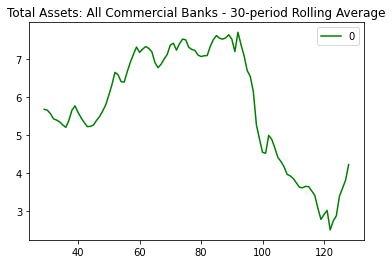

In [45]:
assets=pd.DataFrame(assets)
assets.rolling(window=30).mean().plot(style='g')
pyplot.title("Total Assets: All Commercial Banks - 30-period Rolling Average")